**Decision Trees - Expanded Module**

Dataset: [Solar Power Generation](https://www.kaggle.com/anikannal/solar-power-generation-datas)

# Imports

In [1]:
# Imports
import plotly.express as px
import numpy as np
import pandas as pd
import datetime
#import time #PH - add if the code below requires it

# Prepping Dataset

## Loading Data

In [2]:
#https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
url = 'https://github.com/phestvik/Amii_SolarPowerGenerationData/blob/main/'
raw_flag = '?raw=true'

file1 = url + 'Plant_1_Generation_Data.csv' + raw_flag
file2 = url + 'Plant_1_Weather_Sensor_Data.csv' + raw_flag
file3 = url + 'Plant_2_Generation_Data.csv' + raw_flag
file4 = url + 'Plant_2_Weather_Sensor_Data.csv' + raw_flag

df_plant1_gen = pd.read_csv(file1)
df_plant1_sensor = pd.read_csv(file2)
df_plant2_gen = pd.read_csv(file3)
df_plant2_sensor = pd.read_csv(file4)

## Transformations

**Rename Columns**

In [3]:
df_plant1_sensor['SOURCE_KEY'].nunique()

1

In [4]:
df_plant1_sensor['PLANT_ID'].nunique()

1

In [5]:
#Renaming Source Key Column into its true descriptor for generation data
df_plant1_gen.rename(columns={'SOURCE_KEY':'INVERTER_ID'}, inplace=True)
df_plant2_gen.rename(columns={'SOURCE_KEY':'INVERTER_ID'}, inplace=True)
#Dropping Source Key Column from sensor data because it is the same for the entire file
df_plant1_sensor.drop(columns=['SOURCE_KEY'], inplace=True)
df_plant2_sensor.drop(columns=['SOURCE_KEY'], inplace=True)
#Dropping Plant ID from sensor data because it is the same for the entire file
df_plant1_sensor.drop(columns=['PLANT_ID'], inplace=True)
df_plant2_sensor.drop(columns=['PLANT_ID'], inplace=True)

 **DATE_TIME from object to datetime64**

In [6]:
#Passing errors=’coerce’ will force an out-of-bounds date to NaT, in addition to forcing non-dates (or non-parseable dates) to NaT.
df_plant1_gen["DATE_TIME"] = pd.to_datetime(df_plant1_gen["DATE_TIME"], errors='coerce', format='%d-%m-%Y %H:%M')
df_plant1_sensor["DATE_TIME"] = pd.to_datetime(df_plant1_sensor["DATE_TIME"], errors='coerce', format='%Y-%m-%d %H:%M:%S')
df_plant2_gen["DATE_TIME"] = pd.to_datetime(df_plant2_gen["DATE_TIME"], errors='coerce', format='%Y-%m-%d %H:%M:%S')
df_plant2_sensor["DATE_TIME"] = pd.to_datetime(df_plant2_sensor["DATE_TIME"], errors='coerce', format='%Y-%m-%d %H:%M:%S')

**Scaling Plant 1 Power Values**

In [7]:
df_plant1_gen.sample(10)

DATE_TIME  PLANT_ID  ...  DAILY_YIELD  TOTAL_YIELD
2042  2020-05-16 03:00:00   4135001  ...     0.000000  6994033.000
8042  2020-05-18 23:00:00   4135001  ...  5393.000000  6808393.000
61148 2020-06-14 08:45:00   4135001  ...   751.285714  7382674.286
56441 2020-06-12 03:15:00   4135001  ...     0.000000  7415011.000
44527 2020-06-06 11:00:00   4135001  ...  2666.428571  7281756.429
68312 2020-06-17 18:30:00   4135001  ...  5882.714286  7028600.714
63395 2020-06-15 10:15:00   4135001  ...  2182.125000  7408884.125
10363 2020-05-20 02:45:00   4135001  ...     0.000000  7040465.000
20576 2020-05-25 15:45:00   4135001  ...  8473.000000  7070041.000
11042 2020-05-20 10:30:00   4135001  ...  2422.250000  7051706.250

[10 rows x 7 columns]

In [8]:
df_plant2_gen.sample(10)

DATE_TIME  PLANT_ID  ...  DAILY_YIELD   TOTAL_YIELD
17153 2020-05-24 00:00:00   4136001  ...     0.000000  1.708138e+09
7074  2020-05-18 08:30:00   4136001  ...   170.533333  1.412106e+09
28780 2020-05-30 13:15:00   4136001  ...  4612.400000  2.542294e+06
16646 2020-05-23 17:00:00   4136001  ...  9268.600000  1.412149e+09
7342  2020-05-18 11:30:00   4136001  ...  1791.333333  1.708104e+09
5106  2020-05-17 10:15:00   4136001  ...  1968.266667  2.247738e+09
49300 2020-06-09 06:45:00   4136001  ...    47.600000  1.708243e+09
24879 2020-05-28 11:15:00   4136001  ...  3167.500000  2.092174e+08
9222  2020-05-19 09:00:00   4136001  ...   851.066667  1.864337e+07
35424 2020-06-02 17:00:00   4136001  ...  7035.666667  2.563933e+06

[10 rows x 7 columns]

For Plant 1, DC_POWER appears to be 10x what is should be

In [9]:
df_plant1_gen['DC_POWER'] = df_plant1_gen['DC_POWER'] / 10

## Merge Plant and Sensor

**Merge Plant 1 and Sensor 1 | Plant 2 and Sensor 2**

In [10]:
display(df_plant1_gen)
display(df_plant1_sensor)

DATE_TIME  PLANT_ID  ... DAILY_YIELD  TOTAL_YIELD
0     2020-05-15 00:00:00   4135001  ...       0.000    6259559.0
1     2020-05-15 00:00:00   4135001  ...       0.000    6183645.0
2     2020-05-15 00:00:00   4135001  ...       0.000    6987759.0
3     2020-05-15 00:00:00   4135001  ...       0.000    7602960.0
4     2020-05-15 00:00:00   4135001  ...       0.000    7158964.0
...                   ...       ...  ...         ...          ...
68773 2020-06-17 23:45:00   4135001  ...    5967.000    7287002.0
68774 2020-06-17 23:45:00   4135001  ...    5147.625    7028601.0
68775 2020-06-17 23:45:00   4135001  ...    5819.000    7251204.0
68776 2020-06-17 23:45:00   4135001  ...    5817.000    6583369.0
68777 2020-06-17 23:45:00   4135001  ...    5910.000    7363272.0

[68778 rows x 7 columns]

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
0    2020-05-15 00:00:00            25.184316           22.857507          0.0
1    2020-05-15 00:15:00            25.084589           22.761668          0.0
2    2020-05-15 00:30:00            24.935753           22.592306          0.0
3    2020-05-15 00:45:00            24.846130           22.360852          0.0
4    2020-05-15 01:00:00            24.621525           22.165423          0.0
...                  ...                  ...                 ...          ...
3177 2020-06-17 22:45:00            22.150570           21.480377          0.0
3178 2020-06-17 23:00:00            22.129816           21.389024          0.0
3179 2020-06-17 23:15:00            22.008275           20.709211          0.0
3180 2020-06-17 23:30:00            21.969495           20.734963          0.0
3181 2020-06-17 23:45:00            21.909288           20.427972          0.0

[3182 rows x 4 columns]

In [11]:
dfplant1 = df_plant1_gen.merge(df_plant1_sensor, how='inner', left_on= 'DATE_TIME', right_on= 'DATE_TIME', sort=True)
dfplant2 = df_plant2_gen.merge(df_plant2_sensor, how='inner', left_on= 'DATE_TIME', right_on= 'DATE_TIME', sort=True)

In [12]:
dfplant1

DATE_TIME  PLANT_ID  ... MODULE_TEMPERATURE  IRRADIATION
0     2020-05-15 00:00:00   4135001  ...          22.857507          0.0
1     2020-05-15 00:00:00   4135001  ...          22.857507          0.0
2     2020-05-15 00:00:00   4135001  ...          22.857507          0.0
3     2020-05-15 00:00:00   4135001  ...          22.857507          0.0
4     2020-05-15 00:00:00   4135001  ...          22.857507          0.0
...                   ...       ...  ...                ...          ...
68769 2020-06-17 23:45:00   4135001  ...          20.427972          0.0
68770 2020-06-17 23:45:00   4135001  ...          20.427972          0.0
68771 2020-06-17 23:45:00   4135001  ...          20.427972          0.0
68772 2020-06-17 23:45:00   4135001  ...          20.427972          0.0
68773 2020-06-17 23:45:00   4135001  ...          20.427972          0.0

[68774 rows x 10 columns]

# Feature Engineering

## Hour

Create HOUR from DATE_TIME

In [13]:
# Create time from date time
dfplant1['HOUR'] = dfplant1['DATE_TIME'].dt.hour
dfplant1['HOUR'] = dfplant1['HOUR'].astype('int')
#dfplant1['DATE'] = dfplant1['DATE_TIME'].dt.date #PH - commented out. not sure if we need this for the analysis

dfplant2['HOUR'] = dfplant2['DATE_TIME'].dt.hour
dfplant2['HOUR'] = dfplant2['HOUR'].astype('int')
#dfplant2['DATE'] = dfplant2['DATE_TIME'].dt.date #PH - commented out. not sure if we need this for the analysis

In [14]:
dfplant1

DATE_TIME  PLANT_ID  ... IRRADIATION  HOUR
0     2020-05-15 00:00:00   4135001  ...         0.0     0
1     2020-05-15 00:00:00   4135001  ...         0.0     0
2     2020-05-15 00:00:00   4135001  ...         0.0     0
3     2020-05-15 00:00:00   4135001  ...         0.0     0
4     2020-05-15 00:00:00   4135001  ...         0.0     0
...                   ...       ...  ...         ...   ...
68769 2020-06-17 23:45:00   4135001  ...         0.0    23
68770 2020-06-17 23:45:00   4135001  ...         0.0    23
68771 2020-06-17 23:45:00   4135001  ...         0.0    23
68772 2020-06-17 23:45:00   4135001  ...         0.0    23
68773 2020-06-17 23:45:00   4135001  ...         0.0    23

[68774 rows x 11 columns]

## Inverter Loading Ratio (ILR)

In [15]:
dfplant1['IRL'] = dfplant1['DC_POWER'] / dfplant1['AC_POWER']
dfplant2['IRL'] = dfplant2['DC_POWER'] / dfplant2['AC_POWER']

## Plant Power

Calculate the the DC Power at 12pm (peak power) for the entire plant.
Remember DC_POWER is in KW

In [16]:
#dfplant1.query(f'(DATE_TIME > "{datetime.date(2020,5,15)}") and (DATE_TIME < "{datetime.date(2020,5,16)}")')
dfplant1.query(f'(DATE_TIME == "{datetime.datetime(2020,5,15,12,0,0)}")').sum()

PLANT_ID                                                        90970022
INVERTER_ID            1BY6WEcLGh8j5v71IF53ai7Xc0U56Y3PZuoBAID5Wc2HD7...
DC_POWER                                                         15582.2
AC_POWER                                                         15250.8
DAILY_YIELD                                                      59620.9
TOTAL_YIELD                                                  1.50821e+08
AMBIENT_TEMPERATURE                                              688.718
MODULE_TEMPERATURE                                               1082.04
IRRADIATION                                                      11.3292
HOUR                                                                 264
IRL                                                              22.4766
dtype: object

So Plant 1's peak power is ~156MW.

In [17]:
dfplant2.query(f'(DATE_TIME == "{datetime.datetime(2020,5,15,12,0,0)}")').DC_POWER.sum()

16969.051904761905

So Plant 2's peak power is ~17MW.

Check that MODULE_TEMPERATUERE AND IRRADIATION is the same for all INVERTER_IRs

In [18]:
dfplant1.query(f'(DATE_TIME == "{datetime.datetime(2020,5,15,12,0,0)}")')

DATE_TIME  PLANT_ID  ... HOUR       IRL
1036 2020-05-15 12:00:00   4135001  ...   12  1.022433
1037 2020-05-15 12:00:00   4135001  ...   12  1.022154
1038 2020-05-15 12:00:00   4135001  ...   12  1.021353
1039 2020-05-15 12:00:00   4135001  ...   12  1.021475
1040 2020-05-15 12:00:00   4135001  ...   12  1.020954
1041 2020-05-15 12:00:00   4135001  ...   12  1.021610
1042 2020-05-15 12:00:00   4135001  ...   12  1.021303
1043 2020-05-15 12:00:00   4135001  ...   12  1.022555
1044 2020-05-15 12:00:00   4135001  ...   12  1.022374
1045 2020-05-15 12:00:00   4135001  ...   12  1.022397
1046 2020-05-15 12:00:00   4135001  ...   12  1.021992
1047 2020-05-15 12:00:00   4135001  ...   12  1.022342
1048 2020-05-15 12:00:00   4135001  ...   12  1.021413
1049 2020-05-15 12:00:00   4135001  ...   12  1.023323
1050 2020-05-15 12:00:00   4135001  ...   12  1.020708
1051 2020-05-15 12:00:00   4135001  ...   12  1.021027
1052 2020-05-15 12:00:00   4135001  ...   12  1.020959
1053 2020-05-15 12:00:00   4135001  ...   12  1.020641
1054 2020-05-15 12:00:00   4135001  ...   12  1.021392
1055 2020-05-15 12:00:00   4135001  ...   12  1.021381
1056 2020-05-15 12:00:00   4135001  ...   12  1.021398
1057 2020-05-15 12:00:00   4135001  ...   12  1.021375

[22 rows x 12 columns]

In [19]:
dfplant1.query(f'(DATE_TIME == "{datetime.datetime(2020,5,15,12,0,0)}")').MODULE_TEMPERATURE.mean()
dfplant1.query(f'(DATE_TIME == "{datetime.datetime(2020,5,15,12,0,0)}")').INVERTER_ID.count()

22

**Create a DF for Plant Power**

In [20]:
listData = []

uniqueDate_Time = dfplant1['DATE_TIME'].unique()
for i in uniqueDate_Time:
  #nned to add a feature for # of inverters for each time stamp
  #to show this after do a histo or line plot to show the concept
  a = dfplant1.query(f'(DATE_TIME == "{i}")').DC_POWER.sum()
  b = dfplant1.query(f'(DATE_TIME == "{i}")').INVERTER_ID.count()
  c = dfplant1.query(f'(DATE_TIME == "{i}")').AMBIENT_TEMPERATURE.mean()
  d = dfplant1.query(f'(DATE_TIME == "{i}")').MODULE_TEMPERATURE.mean()
  e = dfplant1.query(f'(DATE_TIME == "{i}")').IRRADIATION.mean()
  f = dfplant1.query(f'(DATE_TIME == "{i}")').HOUR.mean()
  listData.append([i, a, b, c, d, e, f])

In [21]:
listData2 = []

uniqueDate_Time = dfplant2['DATE_TIME'].unique()
for i in uniqueDate_Time:
  #nned to add a feature for # of inverters for each time stamp
  #to show this after do a histo or line plot to show the concept
  a = dfplant2.query(f'(DATE_TIME == "{i}")').DC_POWER.sum()
  b = dfplant2.query(f'(DATE_TIME == "{i}")').INVERTER_ID.count()
  c = dfplant2.query(f'(DATE_TIME == "{i}")').AMBIENT_TEMPERATURE.mean()
  d = dfplant2.query(f'(DATE_TIME == "{i}")').MODULE_TEMPERATURE.mean()
  e = dfplant2.query(f'(DATE_TIME == "{i}")').IRRADIATION.mean()
  f = dfplant2.query(f'(DATE_TIME == "{i}")').HOUR.mean()
  listData2.append([i, a, b, c, d, e, f])

In [22]:
cols = ['DATE_TIME', 'PLANT_POWER', 'NUM_INVERTERS', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'HOUR']
dfplant1_PP = pd.DataFrame(listData, columns=cols)
dfplant2_PP = pd.DataFrame(listData2, columns=cols)

In [23]:
dfplant1_PP['HOUR'] = dfplant1_PP['HOUR'].astype('int8')
dfplant1_PP['NUM_INVERTERS'] = dfplant1_PP['NUM_INVERTERS'].astype('int8')

In [24]:
dfplant2_PP['HOUR'] = dfplant2_PP['HOUR'].astype('int8')
dfplant2_PP['NUM_INVERTERS'] = dfplant2_PP['NUM_INVERTERS'].astype('int8')

# Append DFs

**Append Plant 1 and Plant 2**

In [25]:
dfplant1_PP['PLANT_ID'] = 1
dfplant2_PP['PLANT_ID'] = 2

In [26]:
df_plants = dfplant1_PP.append(dfplant2_PP, ignore_index=True)

In [27]:
df_plants['PLANT_ID'] = df_plants['PLANT_ID'].astype('category')

In [28]:
df_plants.sample(10)

DATE_TIME   PLANT_POWER  ...  HOUR  PLANT_ID
5379 2020-06-07 04:45:00      0.000000  ...     4         2
5014 2020-06-03 09:15:00   9250.087619  ...     9         2
1148 2020-05-27 17:15:00   3924.414286  ...    17         1
6086 2020-06-14 13:30:00  13391.940000  ...    13         2
1658 2020-06-02 08:30:00  18084.416071  ...     8         1
1079 2020-05-27 00:00:00      0.000000  ...     0         1
6135 2020-06-15 01:45:00      0.000000  ...     1         2
2381 2020-06-09 21:30:00      0.000000  ...    21         1
2428 2020-06-10 09:15:00  16920.185714  ...     9         1
3486 2020-05-18 10:30:00  10860.010476  ...    10         2

[10 rows x 8 columns]

# PLANT_POWER_CAT

In [29]:
df_plants['PLANT_POWER_CAT'] = pd.cut(df_plants['PLANT_POWER'], bins=3, labels=['LOW','MEDIUM','HIGH'])

In [30]:
fig = px.histogram(df_plants, x='PLANT_POWER_CAT', marginal="box", height=300)
fig.show()

In [31]:
df_plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416 entries, 0 to 6415
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            6416 non-null   datetime64[ns]
 1   PLANT_POWER          6416 non-null   float64       
 2   NUM_INVERTERS        6416 non-null   int8          
 3   AMBIENT_TEMPERATURE  6416 non-null   float64       
 4   MODULE_TEMPERATURE   6416 non-null   float64       
 5   IRRADIATION          6416 non-null   float64       
 6   HOUR                 6416 non-null   int8          
 7   PLANT_ID             6416 non-null   category      
 8   PLANT_POWER_CAT      6416 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(4), int8(2)
memory usage: 276.0 KB


In [32]:
df_plants['PLANT_POWER_CAT'] = df_plants['PLANT_POWER_CAT'].astype(object)

In [33]:
df_plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416 entries, 0 to 6415
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            6416 non-null   datetime64[ns]
 1   PLANT_POWER          6416 non-null   float64       
 2   NUM_INVERTERS        6416 non-null   int8          
 3   AMBIENT_TEMPERATURE  6416 non-null   float64       
 4   MODULE_TEMPERATURE   6416 non-null   float64       
 5   IRRADIATION          6416 non-null   float64       
 6   HOUR                 6416 non-null   int8          
 7   PLANT_ID             6416 non-null   category      
 8   PLANT_POWER_CAT      6416 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(4), int8(2), object(1)
memory usage: 319.8+ KB


In [34]:
df_plants.loc[df_plants.PLANT_POWER == 0, 'PLANT_POWER_CAT'] = 'OFF'

In [35]:
df_plants['PLANT_POWER_CAT'] = df_plants['PLANT_POWER_CAT'].astype('category')

In [36]:
df_plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416 entries, 0 to 6415
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            6416 non-null   datetime64[ns]
 1   PLANT_POWER          6416 non-null   float64       
 2   NUM_INVERTERS        6416 non-null   int8          
 3   AMBIENT_TEMPERATURE  6416 non-null   float64       
 4   MODULE_TEMPERATURE   6416 non-null   float64       
 5   IRRADIATION          6416 non-null   float64       
 6   HOUR                 6416 non-null   int8          
 7   PLANT_ID             6416 non-null   category      
 8   PLANT_POWER_CAT      6416 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(4), int8(2)
memory usage: 276.1 KB


In [37]:
fig = px.histogram(df_plants, x='PLANT_POWER_CAT', marginal="box", height=300)
fig.show()

In [38]:
df_plants.sample(20)

DATE_TIME   PLANT_POWER  ...  PLANT_ID  PLANT_POWER_CAT
4863 2020-06-01 19:30:00      0.000000  ...         2              OFF
4153 2020-05-25 09:30:00  15880.720000  ...         2           MEDIUM
1354 2020-05-30 04:30:00      0.000000  ...         1              OFF
689  2020-05-22 20:30:00      0.000000  ...         1              OFF
3250 2020-05-15 23:30:00      0.000000  ...         2              OFF
1612 2020-06-01 21:00:00      0.000000  ...         1              OFF
2923 2020-06-15 13:00:00  22259.012501  ...         1             HIGH
4545 2020-05-29 11:30:00  10791.015238  ...         2           MEDIUM
5032 2020-06-03 13:45:00  11944.656667  ...         2           MEDIUM
5452 2020-06-07 23:00:00      0.000000  ...         2              OFF
2579 2020-06-11 23:00:00      0.000000  ...         1              OFF
4006 2020-05-23 20:45:00      0.000000  ...         2              OFF
4358 2020-05-27 12:45:00  10980.620000  ...         2           MEDIUM
4249 2020-05-26 09:30:00  17000.400952  ...         2           MEDIUM
427  2020-05-19 14:15:00  20973.362500  ...         1             HIGH
579  2020-05-21 17:00:00   2343.773214  ...         1              LOW
2671 2020-06-12 22:00:00      0.000000  ...         1              OFF
4254 2020-05-26 10:45:00  18309.700000  ...         2           MEDIUM
4879 2020-06-01 23:30:00      0.000000  ...         2              OFF
3182 2020-05-15 06:15:00    587.179524  ...         2              LOW

[20 rows x 9 columns]

In [39]:
df_plants['PLANT_POWER'].corr(df_plants['IRRADIATION'])

0.9384772775611422

# Normalization

In [40]:
X_cols_num = ['NUM_INVERTERS','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','HOUR']
X_cols_cat = ['PLANT_ID']

#y_cols = ['PLANT_POWER']
y_cols = ['PLANT_POWER_CAT']

## Min-Max Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

In [42]:
X_plants_mms = df_plants.reindex(columns=(X_cols_cat + X_cols_num)) #select the features cols for ML with category first and numerical last
scaled_data = minmax_scaler.fit_transform(X_plants_mms[X_cols_num]) #scale the numeric fields
df_scaled = pd.DataFrame(scaled_data, columns=X_plants_mms[X_cols_num].columns) #create a df from scaled data
X_plants_mms[X_cols_num] = df_scaled
y_plants_mms = df_plants[y_cols]

In [43]:
X_plants_mms

PLANT_ID  NUM_INVERTERS  ...  IRRADIATION      HOUR
0           1       0.944444  ...          0.0  0.000000
1           1       0.944444  ...          0.0  0.000000
2           1       0.944444  ...          0.0  0.000000
3           1       0.944444  ...          0.0  0.000000
4           1       1.000000  ...          0.0  0.043478
...       ...            ...  ...          ...       ...
6411        2       1.000000  ...          0.0  0.956522
6412        2       1.000000  ...          0.0  1.000000
6413        2       1.000000  ...          0.0  1.000000
6414        2       1.000000  ...          0.0  1.000000
6415        2       1.000000  ...          0.0  1.000000

[6416 rows x 6 columns]

In [44]:
X_plants_mms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416 entries, 0 to 6415
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PLANT_ID             6416 non-null   category
 1   NUM_INVERTERS        6416 non-null   float64 
 2   AMBIENT_TEMPERATURE  6416 non-null   float64 
 3   MODULE_TEMPERATURE   6416 non-null   float64 
 4   IRRADIATION          6416 non-null   float64 
 5   HOUR                 6416 non-null   float64 
dtypes: category(1), float64(5)
memory usage: 257.1 KB


## Standardization

In [45]:
from sklearn.preprocessing import StandardScaler
z_score_scaler = StandardScaler()

In [46]:
whose_code = "Alfred"
if whose_code == 'Alfred':
  print(whose_code)
  X_plants_std = df_plants[X_cols_num + X_cols_cat]
  X_plants_std_num = X_plants_std.iloc[:, :-1]
  X_plants_std.iloc[:, :-1] = z_score_scaler.fit_transform(X_plants_std_num)
  y_plants_std = df_plants[y_cols]
  X_plants_std
else:
  print(whose_code)
  X_plants_std = df_plants.reindex(columns=(X_cols_cat + X_cols_num)) #select the features cols for ML with category first and numerical last
  scaled_data = z_score_scaler.fit_transform(X_plants_std[X_cols_num]) #scale the numeric fields
  df_scaled = pd.DataFrame(scaled_data, columns=X_plants_std[X_cols_num].columns) #create a df from scaled data
  X_plants_std[X_cols_num] = df_scaled
  y_plants_std = df_plants[y_cols]

Alfred


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
X_plants_std

NUM_INVERTERS  AMBIENT_TEMPERATURE  ...      HOUR  PLANT_ID
0         -0.142504            -0.419568  ... -1.676175         1
1         -0.142504            -0.444920  ... -1.676175         1
2         -0.142504            -0.482757  ... -1.676175         1
3         -0.142504            -0.505540  ... -1.676175         1
4          0.384170            -0.562637  ... -1.531148         1
...             ...                  ...  ...       ...       ...
6411       0.384170            -0.844769  ...  1.514421         2
6412       0.384170            -0.852248  ...  1.659448         2
6413       0.384170            -0.884671  ...  1.659448         2
6414       0.384170            -0.900863  ...  1.659448         2
6415       0.384170            -0.923279  ...  1.659448         2

[6416 rows x 6 columns]

In [48]:
X_plants_std

NUM_INVERTERS  AMBIENT_TEMPERATURE  ...      HOUR  PLANT_ID
0         -0.142504            -0.419568  ... -1.676175         1
1         -0.142504            -0.444920  ... -1.676175         1
2         -0.142504            -0.482757  ... -1.676175         1
3         -0.142504            -0.505540  ... -1.676175         1
4          0.384170            -0.562637  ... -1.531148         1
...             ...                  ...  ...       ...       ...
6411       0.384170            -0.844769  ...  1.514421         2
6412       0.384170            -0.852248  ...  1.659448         2
6413       0.384170            -0.884671  ...  1.659448         2
6414       0.384170            -0.900863  ...  1.659448         2
6415       0.384170            -0.923279  ...  1.659448         2

[6416 rows x 6 columns]

# PM4 Assignment

## Split Data

In [49]:
from sklearn.model_selection import train_test_split
X_plants_train, X_plants_test = train_test_split(X_plants_std, test_size=0.2) #random_state=42
y_plants_train, y_plants_test = train_test_split(y_plants_std, test_size=0.2) #random_state=42

## Exploring DT Construction

In [50]:
class_report = []

### Criterion hyperparameter

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtree = DecisionTreeClassifier()
dtree.fit(X_plants_train,y_plants_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
from sklearn.tree import export_graphviz

In [54]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree,
                           out_file=None,
                           #feature_names = features ,
                           filled= True,
                           rounded = True,
                           special_characters=True,
                           rotate=True

                           )

display(graphviz.Source(dot_data))

In [55]:
#from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini')

# Fit dt to the training set
dtree.fit(X_plants_train, y_plants_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
yhat_train = dtree.predict(X_plants_train)

In [57]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print("Training data:")
print(classification_report(y_plants_train, yhat_train))

class_report.append(['criterion - gini','train',classification_report(y_plants_train, yhat_train)])

Training data:
              precision    recall  f1-score   support

        HIGH       1.00      1.00      1.00       336
         LOW       1.00      1.00      1.00      1200
      MEDIUM       1.00      1.00      1.00      1214
         OFF       1.00      1.00      1.00      2382

    accuracy                           1.00      5132
   macro avg       1.00      1.00      1.00      5132
weighted avg       1.00      1.00      1.00      5132



In [58]:
yhat_test  = dtree.predict(X_plants_test)

print("Test data:")
print(classification_report(y_plants_test, yhat_test))

class_report.append(['criterion - gini','test',classification_report(y_plants_test, yhat_test)])

Test data:
              precision    recall  f1-score   support

        HIGH       0.01      0.01      0.01        88
         LOW       0.21      0.23      0.22       278
      MEDIUM       0.23      0.24      0.24       293
         OFF       0.48      0.47      0.48       625

    accuracy                           0.34      1284
   macro avg       0.24      0.24      0.24      1284
weighted avg       0.34      0.34      0.34      1284



#### entropy

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')

# Fit dt to the training set
dtree.fit(X_plants_train, y_plants_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
yhat_train = dtree.predict(X_plants_train)

In [61]:

from sklearn.metrics import classification_report, plot_confusion_matrix
print("Training data:")
print(classification_report(y_plants_train, yhat_train))

class_report.append(['criterion - entropy','train',classification_report(y_plants_train, yhat_train)])

Training data:
              precision    recall  f1-score   support

        HIGH       1.00      1.00      1.00       336
         LOW       1.00      1.00      1.00      1200
      MEDIUM       1.00      1.00      1.00      1214
         OFF       1.00      1.00      1.00      2382

    accuracy                           1.00      5132
   macro avg       1.00      1.00      1.00      5132
weighted avg       1.00      1.00      1.00      5132



In [62]:
yhat_test  = dtree.predict(X_plants_test)

print("Test data:")
print(classification_report(y_plants_test, yhat_test))

class_report.append(['criterion - entropy','test',classification_report(y_plants_test, yhat_test)])

Test data:
              precision    recall  f1-score   support

        HIGH       0.04      0.05      0.04        88
         LOW       0.26      0.28      0.27       278
      MEDIUM       0.27      0.28      0.27       293
         OFF       0.48      0.44      0.46       625

    accuracy                           0.34      1284
   macro avg       0.26      0.26      0.26      1284
weighted avg       0.35      0.34      0.35      1284



### Splitter hyperparameter

#### best

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(splitter='best')

# Fit dt to the training set
dtree.fit(X_plants_train, y_plants_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
yhat_train = dtree.predict(X_plants_train)

In [65]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print("Training data:")
print(classification_report(y_plants_train, yhat_train))

class_report.append(['splitter - best','train',classification_report(y_plants_train, yhat_train)])

Training data:
              precision    recall  f1-score   support

        HIGH       1.00      1.00      1.00       336
         LOW       1.00      1.00      1.00      1200
      MEDIUM       1.00      1.00      1.00      1214
         OFF       1.00      1.00      1.00      2382

    accuracy                           1.00      5132
   macro avg       1.00      1.00      1.00      5132
weighted avg       1.00      1.00      1.00      5132



In [66]:
yhat_test  = dtree.predict(X_plants_test)

print("Test data:")
print(classification_report(y_plants_test, yhat_test))

class_report.append(['splitter - best','test',classification_report(y_plants_test, yhat_test)])

Test data:
              precision    recall  f1-score   support

        HIGH       0.04      0.03      0.04        88
         LOW       0.23      0.26      0.24       278
      MEDIUM       0.25      0.26      0.25       293
         OFF       0.48      0.45      0.47       625

    accuracy                           0.34      1284
   macro avg       0.25      0.25      0.25      1284
weighted avg       0.34      0.34      0.34      1284



#### random

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(splitter='random')

# Fit dt to the training set
dtree.fit(X_plants_train, y_plants_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [68]:
yhat_train = dtree.predict(X_plants_train)

In [69]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print("Training data:")
print(classification_report(y_plants_train, yhat_train))

class_report.append(['splitter - random','train',classification_report(y_plants_train, yhat_train)])

Training data:
              precision    recall  f1-score   support

        HIGH       1.00      1.00      1.00       336
         LOW       1.00      1.00      1.00      1200
      MEDIUM       1.00      1.00      1.00      1214
         OFF       1.00      1.00      1.00      2382

    accuracy                           1.00      5132
   macro avg       1.00      1.00      1.00      5132
weighted avg       1.00      1.00      1.00      5132



In [70]:
yhat_test  = dtree.predict(X_plants_test)

print("Test data:")
print(classification_report(y_plants_test, yhat_test))

class_report.append(['splitter - random','test',classification_report(y_plants_test, yhat_test)])

Test data:
              precision    recall  f1-score   support

        HIGH       0.02      0.02      0.02        88
         LOW       0.19      0.19      0.19       278
      MEDIUM       0.26      0.29      0.27       293
         OFF       0.50      0.45      0.47       625

    accuracy                           0.33      1284
   macro avg       0.24      0.24      0.24      1284
weighted avg       0.34      0.33      0.34      1284



### min_samples_split

#### value 2

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(min_samples_split=2)

# Fit dt to the training set
dtree.fit(X_plants_train, y_plants_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
yhat_train = dtree.predict(X_plants_train)

In [73]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print("Training data:")
print(classification_report(y_plants_train, yhat_train))

class_report.append(['min_samples_split - 2','train',classification_report(y_plants_train, yhat_train)])

Training data:
              precision    recall  f1-score   support

        HIGH       1.00      1.00      1.00       336
         LOW       1.00      1.00      1.00      1200
      MEDIUM       1.00      1.00      1.00      1214
         OFF       1.00      1.00      1.00      2382

    accuracy                           1.00      5132
   macro avg       1.00      1.00      1.00      5132
weighted avg       1.00      1.00      1.00      5132



In [74]:
yhat_test  = dtree.predict(X_plants_test)

print("Test data:")
print(classification_report(y_plants_test, yhat_test))

class_report.append(['min_samples_split - 2','test',classification_report(y_plants_test, yhat_test)])

Test data:
              precision    recall  f1-score   support

        HIGH       0.01      0.01      0.01        88
         LOW       0.22      0.24      0.23       278
      MEDIUM       0.23      0.25      0.24       293
         OFF       0.47      0.44      0.45       625

    accuracy                           0.32      1284
   macro avg       0.23      0.23      0.23      1284
weighted avg       0.33      0.32      0.33      1284



#### value 3

In [75]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(min_samples_split=3)

# Fit dt to the training set
dtree.fit(X_plants_train, y_plants_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
yhat_train = dtree.predict(X_plants_train)

In [77]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print("Training data:")
print(classification_report(y_plants_train, yhat_train))

class_report.append(['min_samples_split - 3','train',classification_report(y_plants_train, yhat_train)])

Training data:
              precision    recall  f1-score   support

        HIGH       0.78      1.00      0.88       336
         LOW       0.89      0.97      0.93      1200
      MEDIUM       0.94      0.93      0.93      1214
         OFF       1.00      0.92      0.96      2382

    accuracy                           0.94      5132
   macro avg       0.90      0.95      0.92      5132
weighted avg       0.95      0.94      0.94      5132



In [78]:
yhat_test  = dtree.predict(X_plants_test)

print("Test data:")
print(classification_report(y_plants_test, yhat_test))

class_report.append(['min_samples_split - 3','test',classification_report(y_plants_test, yhat_test)])

Test data:
              precision    recall  f1-score   support

        HIGH       0.02      0.02      0.02        88
         LOW       0.21      0.26      0.23       278
      MEDIUM       0.23      0.24      0.23       293
         OFF       0.48      0.43      0.45       625

    accuracy                           0.32      1284
   macro avg       0.24      0.24      0.23      1284
weighted avg       0.34      0.32      0.33      1284



### min_samples_leaf

#### value 1

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(min_samples_leaf=1)

# Fit dt to the training set
dtree.fit(X_plants_train, y_plants_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
yhat_train = dtree.predict(X_plants_train)

In [81]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print("Training data:")
print(classification_report(y_plants_train, yhat_train))

class_report.append(['min_samples_leaf - 1','train',classification_report(y_plants_train, yhat_train)])

Training data:
              precision    recall  f1-score   support

        HIGH       1.00      1.00      1.00       336
         LOW       1.00      1.00      1.00      1200
      MEDIUM       1.00      1.00      1.00      1214
         OFF       1.00      1.00      1.00      2382

    accuracy                           1.00      5132
   macro avg       1.00      1.00      1.00      5132
weighted avg       1.00      1.00      1.00      5132



In [82]:
yhat_test  = dtree.predict(X_plants_test)

print("Test data:")
print(classification_report(y_plants_test, yhat_test))

class_report.append(['min_samples_leaf - 1','test',classification_report(y_plants_test, yhat_test)])

Test data:
              precision    recall  f1-score   support

        HIGH       0.01      0.01      0.01        88
         LOW       0.24      0.25      0.24       278
      MEDIUM       0.26      0.27      0.26       293
         OFF       0.49      0.48      0.49       625

    accuracy                           0.35      1284
   macro avg       0.25      0.25      0.25      1284
weighted avg       0.35      0.35      0.35      1284



#### value 2

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(min_samples_leaf=2)

# Fit dt to the training set
dtree.fit(X_plants_train, y_plants_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [84]:
yhat_train = dtree.predict(X_plants_train)

In [85]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print("Training data:")
print(classification_report(y_plants_train, yhat_train))

class_report.append(['min_samples_leaf - 2','train',classification_report(y_plants_train, yhat_train)])

Training data:
              precision    recall  f1-score   support

        HIGH       0.56      0.90      0.69       336
         LOW       0.75      0.88      0.81      1200
      MEDIUM       0.82      0.78      0.80      1214
         OFF       0.96      0.81      0.88      2382

    accuracy                           0.83      5132
   macro avg       0.77      0.85      0.80      5132
weighted avg       0.85      0.83      0.83      5132



In [86]:
yhat_test  = dtree.predict(X_plants_test)

print("Test data:")
print(classification_report(y_plants_test, yhat_test))

class_report.append(['min_samples_leaf - 2','test',classification_report(y_plants_test, yhat_test)])

Test data:
              precision    recall  f1-score   support

        HIGH       0.02      0.02      0.02        88
         LOW       0.21      0.26      0.23       278
      MEDIUM       0.23      0.24      0.23       293
         OFF       0.49      0.40      0.44       625

    accuracy                           0.31      1284
   macro avg       0.24      0.23      0.23      1284
weighted avg       0.34      0.31      0.32      1284



### max_depth

#### limit depth 4

In [87]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=4)

# Fit dt to the training set
dtree.fit(X_plants_train, y_plants_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [88]:
yhat_train = dtree.predict(X_plants_train)

In [89]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print("Training data:")
print(classification_report(y_plants_train, yhat_train))

class_report.append(['max_depth - 4','train',classification_report(y_plants_train, yhat_train)])

Training data:
              precision    recall  f1-score   support

        HIGH       0.00      0.00      0.00       336
         LOW       0.51      0.02      0.04      1200
      MEDIUM       0.55      0.05      0.09      1214
         OFF       0.47      0.98      0.64      2382

    accuracy                           0.47      5132
   macro avg       0.38      0.26      0.19      5132
weighted avg       0.47      0.47      0.33      5132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [90]:
yhat_test  = dtree.predict(X_plants_test)

print("Test data:")
print(classification_report(y_plants_test, yhat_test))

class_report.append(['max_depth - 4','test',classification_report(y_plants_test, yhat_test)])

Test data:
              precision    recall  f1-score   support

        HIGH       0.00      0.00      0.00        88
         LOW       0.14      0.00      0.01       278
      MEDIUM       0.21      0.02      0.03       293
         OFF       0.49      0.98      0.65       625

    accuracy                           0.48      1284
   macro avg       0.21      0.25      0.17      1284
weighted avg       0.32      0.48      0.33      1284



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### limit depth 8

In [91]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=8)

# Fit dt to the training set
dtree.fit(X_plants_train, y_plants_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [92]:
y_plants_train

PLANT_POWER_CAT
3870          MEDIUM
3357             OFF
1180             OFF
2248          MEDIUM
2357          MEDIUM
...              ...
2879             OFF
2992             LOW
2851             OFF
4228             OFF
541              OFF

[5132 rows x 1 columns]

In [93]:
yhat_train = dtree.predict(X_plants_train)

In [94]:
dtree.get_n_leaves()

96

In [95]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print("Training data:")
print(classification_report(y_plants_train, yhat_train))

class_report.append(['max_depth - 8','train',classification_report(y_plants_train, yhat_train)])

Training data:
              precision    recall  f1-score   support

        HIGH       0.73      0.03      0.06       336
         LOW       0.54      0.11      0.19      1200
      MEDIUM       0.78      0.07      0.13      1214
         OFF       0.48      0.97      0.65      2382

    accuracy                           0.49      5132
   macro avg       0.63      0.30      0.26      5132
weighted avg       0.58      0.49      0.38      5132



In [96]:
yhat_test  = dtree.predict(X_plants_test)

print("Test data:")
print(classification_report(y_plants_test, yhat_test))

class_report.append(['max_depth - 8','test',classification_report(y_plants_test, yhat_test)])

Test data:
              precision    recall  f1-score   support

        HIGH       0.00      0.00      0.00        88
         LOW       0.19      0.04      0.07       278
      MEDIUM       0.26      0.02      0.04       293
         OFF       0.48      0.92      0.63       625

    accuracy                           0.46      1284
   macro avg       0.23      0.25      0.19      1284
weighted avg       0.34      0.46      0.33      1284



In [97]:
dtree.get_n_leaves()

96

In [98]:
#dtree.decision_path(X_plants_test)

### Hyperparameter Overview

In [99]:
for list in class_report:
  if list[1] == "test":
    print(f'{list[0]} - {list[1]}')
    print(list[2])

criterion - gini - test
              precision    recall  f1-score   support

        HIGH       0.01      0.01      0.01        88
         LOW       0.21      0.23      0.22       278
      MEDIUM       0.23      0.24      0.24       293
         OFF       0.48      0.47      0.48       625

    accuracy                           0.34      1284
   macro avg       0.24      0.24      0.24      1284
weighted avg       0.34      0.34      0.34      1284

criterion - entropy - test
              precision    recall  f1-score   support

        HIGH       0.04      0.05      0.04        88
         LOW       0.26      0.28      0.27       278
      MEDIUM       0.27      0.28      0.27       293
         OFF       0.48      0.44      0.46       625

    accuracy                           0.34      1284
   macro avg       0.26      0.26      0.26      1284
weighted avg       0.35      0.34      0.35      1284

splitter - best - test
              precision    recall  f1-score   support

 

For our DT QuAM we varied the hyperparameters recomemnded in the PM along with trying to rerun with different features (ie. removing IRRADIATION) to see how the model responded. In general, the accuracy ranged from ~30% to ~47%. The biggest change we observed was when we changed the max_depth. The min_sample_leaf  hyperparameter had the worse impact on the model.

## Final DT Evaluation

1. The feature used for the first split was HOUR.
2. The number of leaves in the tree is 117.
3. Confusion matrix is below
4. 

This is the start of our optimal DT

In [100]:
from sklearn.tree import DecisionTreeClassifier
#criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1
dtree = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=8, min_samples_split=2, min_samples_leaf=1, )

# Fit dt to the training set
dtree.fit(X_plants_train, y_plants_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
yhat_train = dtree.predict(X_plants_train)

In [102]:
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix

In [103]:
cm = confusion_matrix(y_plants_train, yhat_train)
display(cm)

array([[  11,   11,    0,  314],
       [   2,  137,   11, 1050],
       [   0,   40,   89, 1085],
       [   2,   67,   14, 2299]])

In [104]:
print("Training data:")
print(classification_report(y_plants_train, yhat_train))

class_report.append(['final model','train',classification_report(y_plants_train, yhat_train)])

Training data:
              precision    recall  f1-score   support

        HIGH       0.73      0.03      0.06       336
         LOW       0.54      0.11      0.19      1200
      MEDIUM       0.78      0.07      0.13      1214
         OFF       0.48      0.97      0.64      2382

    accuracy                           0.49      5132
   macro avg       0.63      0.30      0.26      5132
weighted avg       0.58      0.49      0.38      5132



In [105]:
yhat_test  = dtree.predict(X_plants_test)

print("Test data:")
print(classification_report(y_plants_test, yhat_test))

class_report.append(['final model','test',classification_report(y_plants_test, yhat_test)])

Test data:
              precision    recall  f1-score   support

        HIGH       0.00      0.00      0.00        88
         LOW       0.19      0.04      0.07       278
      MEDIUM       0.26      0.02      0.04       293
         OFF       0.48      0.92      0.63       625

    accuracy                           0.46      1284
   macro avg       0.23      0.25      0.19      1284
weighted avg       0.34      0.46      0.33      1284



Calculate the number of leaves

In [106]:
dtree.get_n_leaves()

96

### Plot DT

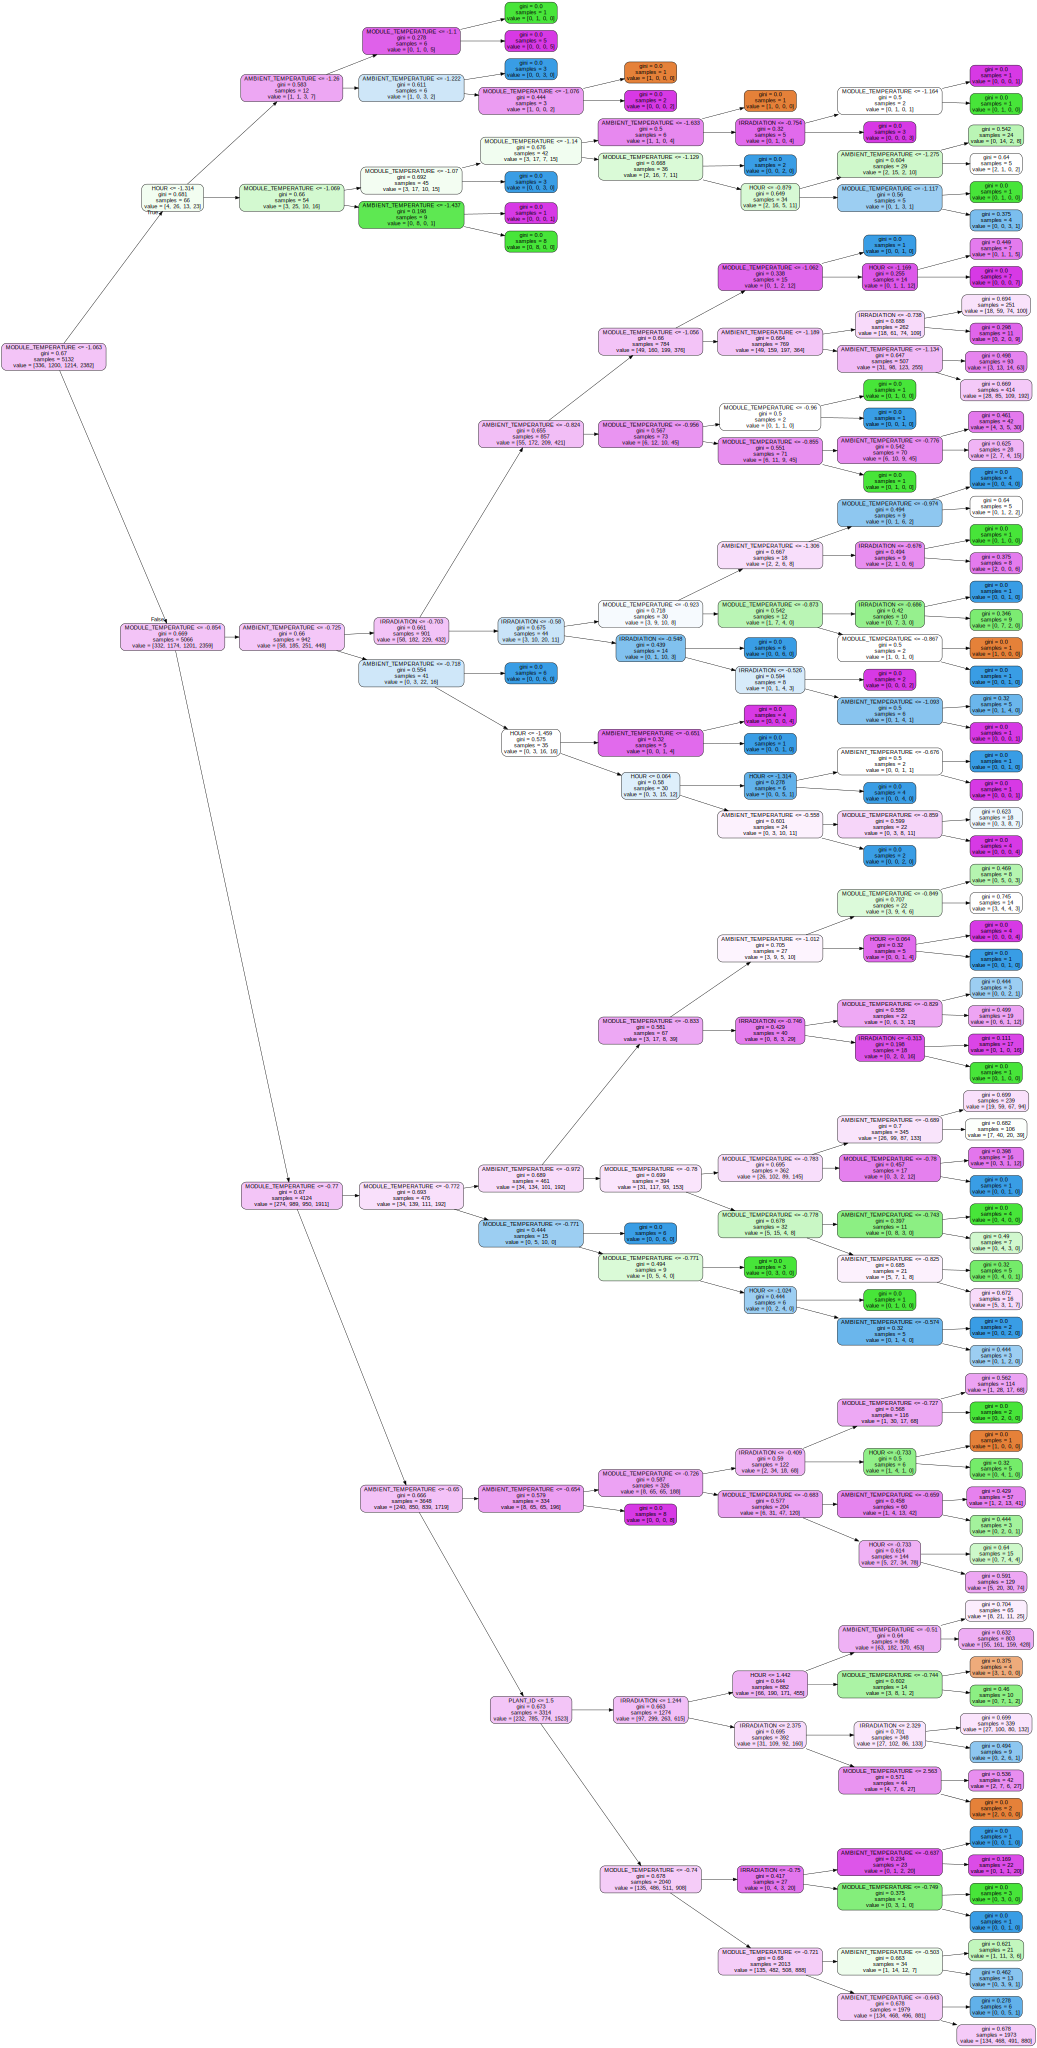

In [107]:
import graphviz
from sklearn.tree import export_graphviz

#X_cols_num + X_cols_cat

dot_data = export_graphviz(dtree,
                           out_file=None, 
                           filled=True,
                           rounded=True,  
                           feature_names=X_cols_num + X_cols_cat,
                           rotate=True)  

display(graphviz.Source(dot_data))

In [109]:

dtree.decision_path(X_plants_test)

<1284x191 sparse matrix of type '<class 'numpy.int64'>'
	with 11512 stored elements in Compressed Sparse Row format>


### Plot Decision Surface



In [ ]:
# select two features for plotting decision boundaries
X2_train = X_plants_train[['MODULE_TEMPERATURE','AMBIENT_TEMPERATURE']].values
X2_test = X_plants_test[['MODULE_TEMPERATURE','AMBIENT_TEMPERATURE']].values

In [ ]:
# change y_train and y_test to numeric for viz purposes 
levels = ['OFF','LOW','MEDIUM','HIGH']
numeric_levels = np.arange(4)
y_train=y_plants_train.replace(levels,numeric_levels)
y_test=y_plants_test.replace(levels,numeric_levels)


In [ ]:
dtree.fit(X2_train,y_train.values.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
x_mins = np.min(X_plants_train, axis=0)
x_maxs = np.max(X_plants_train, axis=0)



In [ ]:
x0_vis_range = np.arange(x_mins[0] - 0.1, x_maxs[0] + 0.1, 0.02)
x1_vis_range = np.arange(x_mins[1] - 0.1, x_maxs[1] + 0.1, 0.02)
XX0_vis, XX1_vis = np.meshgrid(x0_vis_range, x1_vis_range)
X_vis = np.c_[XX0_vis.flatten(), XX1_vis.flatten()]



In [ ]:
yhat_vis = dtree.predict(X_vis)


In [ ]:
YYhat_vis = yhat_vis.reshape(XX0_vis.shape)
yhat_test = dtree.predict(X2_test)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Heatmap(z=YYhat_vis, 
                        x=x0_vis_range,
                        y=x1_vis_range,
                        showscale=False))
fig.add_trace(go.Scatter(x=X2_train[:, 0],
                        y=X2_train[:, 1],
                        mode='markers',
                        marker_color=y_train, 
                        marker_line_width=1))
fig.add_trace(go.Scatter(x=X2_test[:, 0],
                        y=X2_test[:, 1],
                        mode='markers',
                    marker_color=yhat_test,
                        marker_line_width=3))

fig.update_layout(showlegend=False)
fig.update_xaxes(range=[x_mins[0] - 0.1, x_maxs[0] + 0.1],
                title='MODULE_TEMPERATURE')
fig.update_yaxes(range=[x_mins[1] - 0.1, x_maxs[1] + 0.1],
                title='AMBIENT_TEMPERATURE')

fig.show()

### kNN

In [ ]:
from  sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_plants_train, y_plants_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
yhat_train = knn.predict(X_plants_train)
print(classification_report(y_plants_train, yhat_train))

              precision    recall  f1-score   support

        HIGH       0.38      0.70      0.50       342
         LOW       0.51      0.64      0.56      1166
      MEDIUM       0.70      0.40      0.51      1191
         OFF       0.75      0.72      0.73      2433

    accuracy                           0.63      5132
   macro avg       0.58      0.62      0.58      5132
weighted avg       0.66      0.63      0.63      5132



In [ ]:
yhat_test  = dtree.predict(X_plants_test)

print("Test data:")
print(classification_report(y_plants_test, yhat_test))

ValueError: ignored

In [ ]:
losses_list = [['0.45'],
               ['0.45']]
row_names = ["kNN (n=3)", "DT (optimal)"]               
column_names = ["Accuracy"]
display(pd.DataFrame(losses_list, index=row_names, columns=column_names))

Accuracy
kNN (n=3)        0.45
DT (optimal)     0.45

### Business Evaluation

1. The motivation to use a DT is to explain the value that is predicted. We could use which feature the model used was for the first split, and which features were prioritized early in the prediction to get the result, therefore DT give us more information to work with.
2. We should build a regression model. 
3. With our last run we saw that the DT splits at HOUR which is indication that the HOUR of the day is more critical than any other feature including IRRADATION. Therefore, we could use this information to for a business application where we make sure that there are enough inverters to transfer power at the peak sun therefore creating more power and conserving electricity.
4. A company can use the predictions to determine underperforming systems (e.g. predicting faults, maintenance schedules) 
5. Unfortunately our QuAM doesn't change our problem at this time. We are looking forward to use regression for more insights.

# Additional Stuff

## Binning PLANT_POWER

In [ ]:
df_plants.query('PLANT_POWER == 0')

DATE_TIME  PLANT_POWER  ...  PLANT_ID  PLANT_POWER_CAT
0    2020-05-15 00:00:00          0.0  ...         1              OFF
1    2020-05-15 00:15:00          0.0  ...         1              OFF
2    2020-05-15 00:30:00          0.0  ...         1              OFF
3    2020-05-15 00:45:00          0.0  ...         1              OFF
4    2020-05-15 01:00:00          0.0  ...         1              OFF
...                  ...          ...  ...       ...              ...
6411 2020-06-17 22:45:00          0.0  ...         2              OFF
6412 2020-06-17 23:00:00          0.0  ...         2              OFF
6413 2020-06-17 23:15:00          0.0  ...         2              OFF
6414 2020-06-17 23:30:00          0.0  ...         2              OFF
6415 2020-06-17 23:45:00          0.0  ...         2              OFF

[3007 rows x 9 columns]

In [ ]:
df_plant_temp = df_plants.drop(df_plants.query('PLANT_POWER == 0').index)

In [ ]:
df_plant_temp

DATE_TIME  PLANT_POWER  ...  PLANT_ID  PLANT_POWER_CAT
24   2020-05-15 06:00:00    94.214881  ...         1              LOW
25   2020-05-15 06:15:00   614.210119  ...         1              LOW
26   2020-05-15 06:30:00  1527.115476  ...         1              LOW
27   2020-05-15 06:45:00  2862.658929  ...         1              LOW
28   2020-05-15 07:00:00  4134.591429  ...         1              LOW
...                  ...          ...  ...       ...              ...
6391 2020-06-17 17:45:00  2133.540000  ...         2              LOW
6392 2020-06-17 18:00:00  1326.666667  ...         2              LOW
6393 2020-06-17 18:15:00   701.820000  ...         2              LOW
6394 2020-06-17 18:30:00   424.726667  ...         2              LOW
6395 2020-06-17 18:45:00    75.779048  ...         2              LOW

[3409 rows x 9 columns]

In [ ]:
df_plants.shape

(6416, 9)

In [ ]:
df_plant_temp['PLANT_POWER_CAT'] = pd.cut(df_plant_temp['PLANT_POWER'], bins=3, labels=['LOW','MEDIUM','HIGH'])

In [ ]:
fig = px.histogram(df_plant_temp, x='PLANT_POWER_CAT', marginal="box", height=300)
fig.show()

## GridSearch CV

In [ ]:
'''
param_grid = {
    'criterion': ['gini','entropy'], 
    'splitter' : ['best','random'],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_depth': [4, 8]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
'''

"\nparam_grid = {\n    'criterion': ['gini','entropy'], \n    'splitter' : ['best','random'],\n    'min_samples_split': [2, 3],\n    'min_samples_leaf': [1, 2],\n    'max_depth': [4, 8]\n}\n\nscorers = {\n    'precision_score': make_scorer(precision_score),\n    'recall_score': make_scorer(recall_score),\n    'accuracy_score': make_scorer(accuracy_score)\n}\n"

In [ ]:
'''
dtree = DecisionTreeClassifier()
dtree_random = GridSearchCV(estimator = dtree, param_distributions = param_grid, scoring = scorers, refit=refit_score, cv=dtree, return_train_score=True, n_jobs=-1)
grid_search.fit(X_plants_train, y_plants_train)
'''

'\ndtree = DecisionTreeClassifier()\ndtree_random = GridSearchCV(estimator = dtree, param_distributions = param_grid, scoring = scorers, refit=refit_score, cv=dtree, return_train_score=True, n_jobs=-1)\ngrid_search.fit(X_plants_train, y_plants_train)\n'

## Try Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
rforest = RandomForestClassifier()
rforest.fit(X_plants_train, y_plants_train.values.ravel())
yhat_train = rforest.predict(X_plants_train)
yhat_test  = rforest.predict(X_plants_test)


In [ ]:
print("Random forest on training data:")
print(classification_report(y_plants_train, yhat_train))


print("Random forest on test data:")
print(classification_report(y_plants_test, yhat_test))


Random forest on training data:
              precision    recall  f1-score   support

        HIGH       1.00      1.00      1.00       342
         LOW       1.00      1.00      1.00      1166
      MEDIUM       1.00      1.00      1.00      1191
         OFF       1.00      1.00      1.00      2433

    accuracy                           1.00      5132
   macro avg       1.00      1.00      1.00      5132
weighted avg       1.00      1.00      1.00      5132

Random forest on test data:
              precision    recall  f1-score   support

        HIGH       0.06      0.02      0.03        82
         LOW       0.26      0.18      0.21       312
      MEDIUM       0.27      0.19      0.22       316
         OFF       0.45      0.64      0.53       574

    accuracy                           0.38      1284
   macro avg       0.26      0.26      0.25      1284
weighted avg       0.33      0.38      0.34      1284



In [ ]:
#df_plants = df_plant_temp

# To Do



*   Drop IRRADIATION and rerun DT Construction to compare values
*   Manually tune hyperparameters. Use max depth = 8 and recheck gini etc.

*   Drop AMBIENT_TEMPERATURE and rerun DT Construction to compare values
*   Look into class imbalance for the "HIGH" class

